# Analysis of San Francisco crime data

### Primary Finding: Larceny/theft is the most common crime during summer months in San Francisco. It increases at night and on weekends.

In [2]:
%matplotlib inline

import sf_theft as st

In [3]:
data = st.load_data("./sanfrancisco_incidents_summer_2014.csv")

### Larceny / theft is the most common crime:
From the histogram of all the crime categories, we can see LARCENY/THEFT is the most common crime, so let's focus on this particular kind of crime in this analysis.

In this analysis, we only look at the date and time of the theft crime and try to see if there is any patterns.

In particular, we want to know:
- Which day of week is theft more likely to happen in summer of San Francisco? Does it happen more on weekday or weekend? Or there is no difference?
- What time of day is theft more likely to happen? Is the pattern the same for different day of week? 

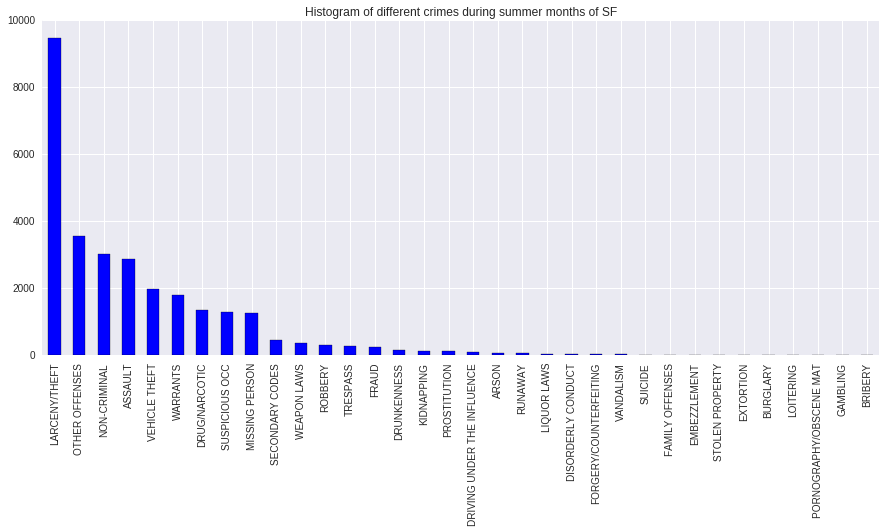

In [5]:
data.Category.value_counts().plot(kind='bar', figsize=(15, 6), 
                                  title='Histogram of different crimes during summer months of SF');

### There are more theft on weekends (Fri - Sun):
From the histogram below, we can see it seems there are more theft from Fri - Sun.

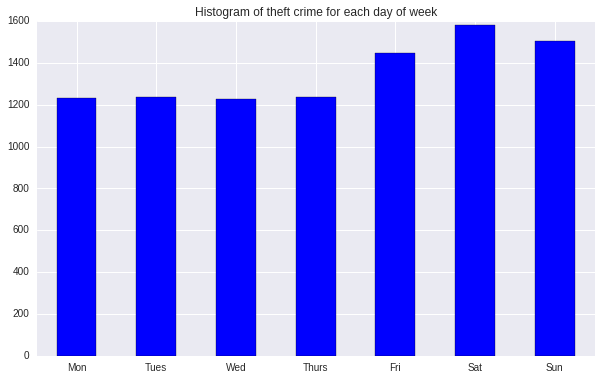

In [7]:
df = st.process_data(data)
ax = df.dow.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), 
                                             title='Histogram of theft crime for each day of week')
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation='horizontal');

From the timeline view below, we can further confirm this pattern - the peaks of daily thefts all fall on weekend (weekend is highlighted in red)

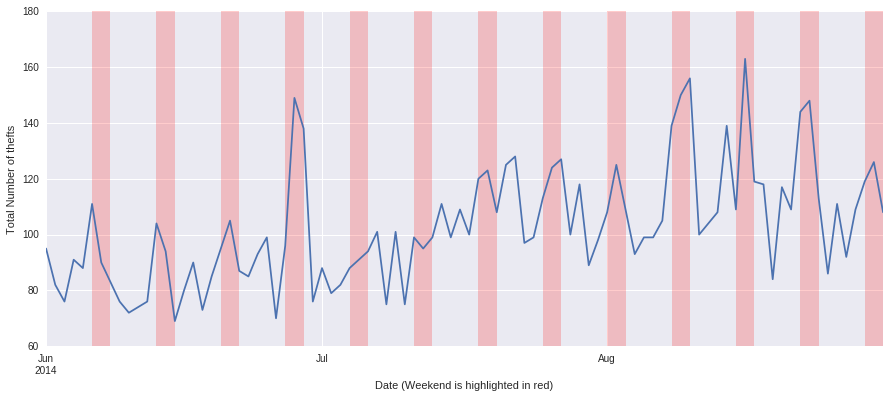

In [8]:
st.plot_ts(df)

The number of thefts peaks around 6pm:

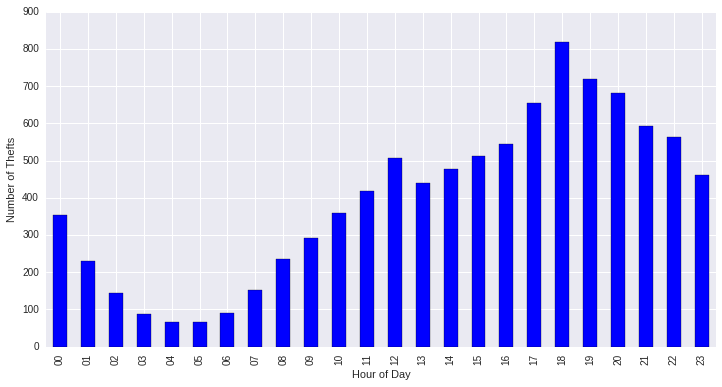

In [12]:
ax2 = df.HourOfDay.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
ax2.set_ylabel('Number of Thefts');
ax2.set_xlabel('Hour of Day');

The following is a heatmap showing the number of thefts for each hour of day and each day of week.

We can see that distribution of thefts for each day of week roughly corresponds to the overall pattern we've seen above: darker area on the right hand side of the chart means higher number of theft crimes at night.  

Interestingly, we found out that the distribution of thefts on Saturday is different from other days - On Saturday, there are more thefts at late night (9pm - 11pm), whereas on other days, the number of thefts peaks at around 5pm - 8pm. Perhaps Saturday night is the time when people go out and thus creates more opportunities for the thieves.

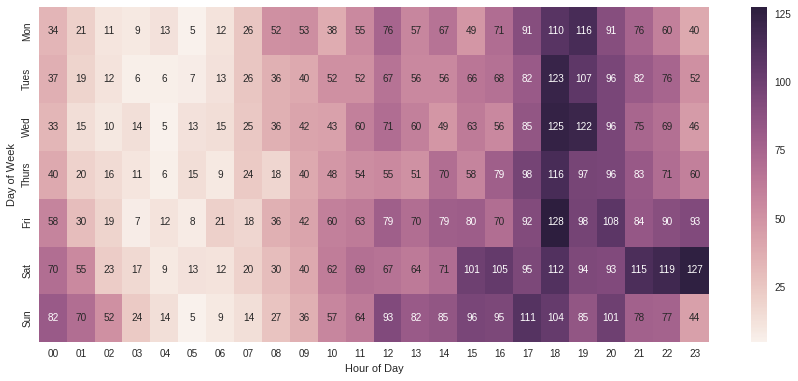

In [10]:
st.plot_heatmap(df)